In [2]:
import pandas as pd
import geopandas as gpd

In [4]:
replica0 = gpd.read_file('../shapes/replicas/stkde_nhpp_0.shp')
replica0.head()


,date,arrival,interarriv,geometry
0,05/25/2020 00:29:12,0.486888,0.486888,POINT (-85.73564 38.26275)
1,05/25/2020 01:24:33,1.409318,0.922430,POINT (-85.74968 38.26523)
2,05/25/2020 02:16:09,2.269379,0.860060,POINT (-85.75521 38.22984)
3,05/25/2020 02:55:46,2.929612,0.660233,POINT (-85.74884 38.25750)
4,05/25/2020 03:11:28,3.191263,0.261652,POINT (-85.75145 38.25501)


In [5]:
replica0['date'] = pd.to_datetime(replica0['date'])

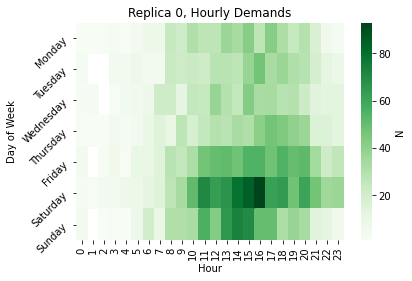

In [16]:
import matplotlib.pyplot as plt
trips_by_day_hour = replica0.groupby([replica0['date'].dt.weekday, replica0['date'].dt.hour]).size().unstack()
ax = sns.heatmap(trips_by_day_hour, cmap='Greens', cbar_kws={'label': 'N'})
ax.set_xlabel('Hour')
ax.set_ylabel('Day of Week')
ax.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
for tick in ax.get_yticklabels():
    tick.set_rotation(45)
ax.set_title('Replica 0, Hourly Demands')
plt.savefig('replica_demands.png')

In [196]:
rate_fn = sampling_dict['temporal']['nhpp'].build_rate_func([sampling_dict['temporal']['nhpp'].lambda_t[key] for key in [(0, i) for i in range(6)]]

{(0, 2): [{'lb': 0.0, 'ub': 1.0, 'rate': 1.5576923076923077},
  {'lb': 1.0, 'ub': 2.0, 'rate': 1.0769230769230769},
  {'lb': 2.0, 'ub': 3.0, 'rate': 1.5576923076923077},
  {'lb': 3.0, 'ub': 4.0, 'rate': 3.230769230769231},
  {'lb': 4.0, 'ub': 5.0, 'rate': 4.576923076923077},
  {'lb': 5.0, 'ub': 6.0, 'rate': 5.903846153846154},
  {'lb': 6.0, 'ub': 7.0, 'rate': 7.75},
  {'lb': 7.0, 'ub': 8.0, 'rate': 14.73076923076923},
  {'lb': 8.0, 'ub': 9.0, 'rate': 20.134615384615383},
  {'lb': 9.0, 'ub': 10.0, 'rate': 20.307692307692307},
  {'lb': 10.0, 'ub': 11.0, 'rate': 22.98076923076923},
  {'lb': 11.0, 'ub': 12.0, 'rate': 26.96153846153846},
  {'lb': 12.0, 'ub': 13.0, 'rate': 33.34615384615385},
  {'lb': 13.0, 'ub': 14.0, 'rate': 34.0},
  {'lb': 14.0, 'ub': 15.0, 'rate': 34.09615384615385},
  {'lb': 15.0, 'ub': 16.0, 'rate': 37.65384615384615},
  {'lb': 16.0, 'ub': 17.0, 'rate': 39.28846153846154},
  {'lb': 17.0, 'ub': 18.0, 'rate': 37.19230769230769},
  {'lb': 18.0, 'ub': 19.0, 'rate': 34.4038

In [204]:
rate_fn

array([{'lb': 0.0, 'ub': 1.0, 'rate': 1.6346153846153846},
       {'lb': 1.0, 'ub': 2.0, 'rate': 1.0192307692307692},
       {'lb': 2.0, 'ub': 3.0, 'rate': 1.1923076923076923},
       {'lb': 3.0, 'ub': 4.0, 'rate': 2.4423076923076925},
       {'lb': 4.0, 'ub': 5.0, 'rate': 3.5384615384615383},
       {'lb': 5.0, 'ub': 6.0, 'rate': 5.0576923076923075},
       {'lb': 6.0, 'ub': 7.0, 'rate': 7.673076923076923},
       {'lb': 7.0, 'ub': 8.0, 'rate': 12.288461538461538},
       {'lb': 8.0, 'ub': 9.0, 'rate': 18.384615384615383},
       {'lb': 9.0, 'ub': 10.0, 'rate': 19.48076923076923},
       {'lb': 10.0, 'ub': 11.0, 'rate': 24.5},
       {'lb': 11.0, 'ub': 12.0, 'rate': 29.173076923076923},
       {'lb': 12.0, 'ub': 13.0, 'rate': 33.76923076923077},
       {'lb': 13.0, 'ub': 14.0, 'rate': 34.17307692307692},
       {'lb': 14.0, 'ub': 15.0, 'rate': 32.98076923076923},
       {'lb': 15.0, 'ub': 16.0, 'rate': 36.25},
       {'lb': 16.0, 'ub': 17.0, 'rate': 34.15384615384615},
       {'lb': 1

In [24]:
import pickle
from louisville-data.arrival_process.experiment import *
with open('data/sampling_methods_louisville.pickle', 'rb') as file:
    sampling_dict = pickle.load(file)

SyntaxError: invalid syntax (<ipython-input-24-99ca1fcca4fd>, line 2)

In [215]:
rates = sampling_dict['temporal']['nhpp'].rates
rates_dict = {key: [{'lb':hour, 'ub':rates_[i+1][0], 'rate':rate} \
            if i<len(rates_)-1 else {'lb':hour, 'ub':hour+1, 'rate':rate} 
            for i, (hour, rate) in enumerate(rates_)] for key, rates_ in rates.items()}

In [26]:
data = pd.read_csv('../data/data_2019.csv')
data.head()

,Unnamed: 0,TripID,StartDate,StartTime,EndDate,EndTime,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum,date
0,0,0000045c-2677-3a7d-4b73-cad99a57,2019-06-26,19:30,2019-06-26,19:30,3.0,0.000,38.253,-85.756,38.253,-85.755,4,19,2019-06-26 19:30:00
1,8,00011cdb-4801-1ce5-a15d-6b9a539a,2019-06-09,13:30,2019-06-09,13:45,10.0,0.808,38.251,-85.758,38.257,-85.760,1,13,2019-06-09 13:30:00
2,10,00017be7-7711-fadc-e978-da71582c,2019-06-28,05:00,2019-06-28,05:15,19.0,0.497,38.246,-85.755,38.246,-85.756,6,5,2019-06-28 05:00:00
3,11,0001c852-f879-9ff0-3ca9-8221ce91,2019-06-14,21:00,2019-06-14,22:00,53.0,0.000,38.247,-85.733,38.250,-85.737,6,21,2019-06-14 21:00:00
4,15,0002f7fa-0cce-6a6f-5670-80fd71c9,2019-08-03,18:00,2019-08-03,18:15,6.0,0.330,38.255,-85.757,38.253,-85.757,7,18,2019-08-03 18:00:00


In [27]:
data['date'] = pd.to_datetime(data['date'])

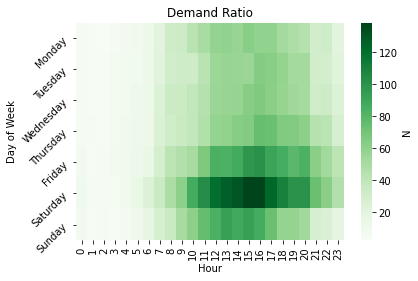

In [33]:
mean_demands = data.groupby([data['date'].dt.day, data['date'].dt.dayofweek, data['date'].dt.hour]).size().mean(level=[1, 2]).unstack()
ax = sns.heatmap(mean_demands, cmap='Greens', cbar_kws={'label': 'N'})
ax.set_xlabel('Hour')
ax.set_ylabel('Day of Week')
ax.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
for tick in ax.get_yticklabels():
    tick.set_rotation(45)
ax.set_title('Demand Ratio')
plt.savefig('data_demands.png')